In [1]:
from import_src import import_src
import_src()

Append /home/v_user/tungpth_ws/MLOpsVN/src to sys.path


In [2]:
from raw_data_processor import RawDataProcessor

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from plotly import express as px

In [4]:
SRC_DIR = '../../data/raw_data/phase-1/prob-2'

In [5]:
df = pd.read_parquet(os.path.join(SRC_DIR, 'raw_train.parquet'))
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.781942,V2,V8,1337.025331,V4,V4,2.0,V2,V0,...,V2,35.689494,none,V1,1.0,V2,1.0,none,yes,0
1,V3,22.764682,V4,V2,1664.415301,V0,V4,4.0,V1,V0,...,V0,23.265980,none,V1,2.0,V2,1.0,none,yes,0
2,V3,7.462099,V2,V3,750.653224,V3,V2,4.0,V2,V0,...,V2,34.060872,stores,V0,1.0,V2,1.0,yes,yes,0
3,V3,23.718364,V4,V7,4829.002078,V4,V2,4.0,V1,V0,...,V3,62.477448,none,V1,2.0,V1,1.0,none,yes,0
4,V3,13.768903,V3,V3,3559.956292,V3,V4,1.0,V1,V0,...,V2,41.999120,bank,V1,1.0,V2,1.0,yes,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,V3,5.834186,V2,V0,1549.229155,V0,V4,3.0,V2,V2,...,V0,52.368811,none,V1,1.0,V2,2.0,none,yes,0
59996,V2,10.379676,V2,V2,2417.228753,V0,V0,2.0,V1,V0,...,V0,70.966537,none,V1,1.0,V0,1.0,none,yes,0
59997,V3,11.601652,V2,V0,1488.169842,V0,V2,2.0,V2,V0,...,V1,32.796094,none,V1,1.0,V1,1.0,none,yes,0
59998,V1,13.837508,V4,V3,11925.211726,V0,V1,2.0,V2,V0,...,V3,33.884187,none,V1,2.0,V2,1.0,none,yes,0


In [6]:
feature_config = json.load(open(os.path.join(SRC_DIR, 'features_config.json')))
feature_config

{'numeric_columns': ['feature2', 'feature5', 'feature13', 'feature18'],
 'category_columns': ['feature1',
  'feature3',
  'feature4',
  'feature6',
  'feature7',
  'feature8',
  'feature9',
  'feature10',
  'feature11',
  'feature12',
  'feature14',
  'feature15',
  'feature16',
  'feature17',
  'feature19',
  'feature20'],
 'target_column': 'label',
 'ml_type': 'classification'}

In [7]:
df.describe()

,feature2,feature5,feature8,feature11,feature13,feature16,feature18,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,20.862730,3207.836096,2.953933,2.837467,35.641207,1.422100,1.159317,0.303583
std,12.083299,2792.931181,1.120535,1.105427,11.261281,0.606441,0.365974,0.459809
min,0.648717,-5997.669542,1.000000,1.000000,17.673884,1.000000,1.000000,0.000000
25%,11.959326,1388.207670,2.000000,2.000000,27.185828,1.000000,1.000000,0.000000
50%,18.087706,2273.676224,3.000000,3.000000,33.135070,1.000000,1.000000,0.000000
75%,24.903486,3813.300359,4.000000,4.000000,40.958943,2.000000,1.000000,1.000000
max,73.201640,19046.986011,4.000000,4.000000,82.179053,4.000000,2.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   60000 non-null  object 
 1   feature2   60000 non-null  float64
 2   feature3   60000 non-null  object 
 3   feature4   60000 non-null  object 
 4   feature5   60000 non-null  float64
 5   feature6   60000 non-null  object 
 6   feature7   60000 non-null  object 
 7   feature8   60000 non-null  float64
 8   feature9   60000 non-null  object 
 9   feature10  60000 non-null  object 
 10  feature11  60000 non-null  float64
 11  feature12  60000 non-null  object 
 12  feature13  60000 non-null  float64
 13  feature14  60000 non-null  object 
 14  feature15  60000 non-null  object 
 15  feature16  60000 non-null  float64
 16  feature17  60000 non-null  object 
 17  feature18  60000 non-null  float64
 18  feature19  60000 non-null  object 
 19  feature20  60000 non-null  object 
 20  label 

In [9]:
df_numeric = df[feature_config['numeric_columns']]
df_categorical = df[feature_config['category_columns']]
series_label = df['label']

# Univariate

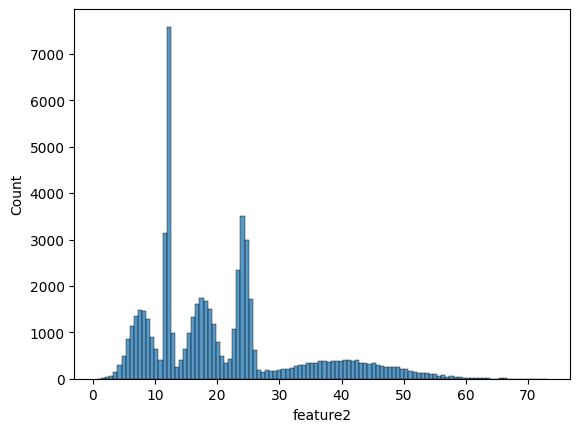

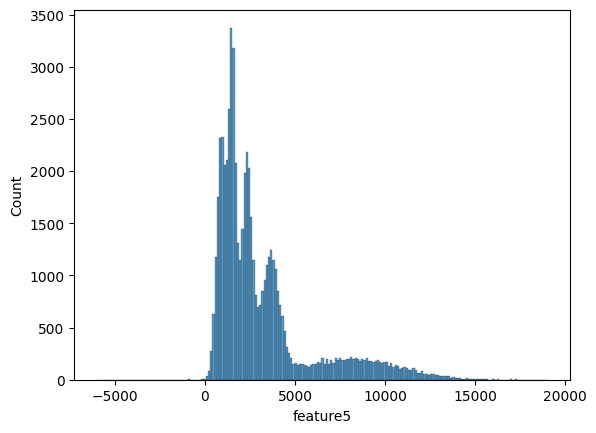

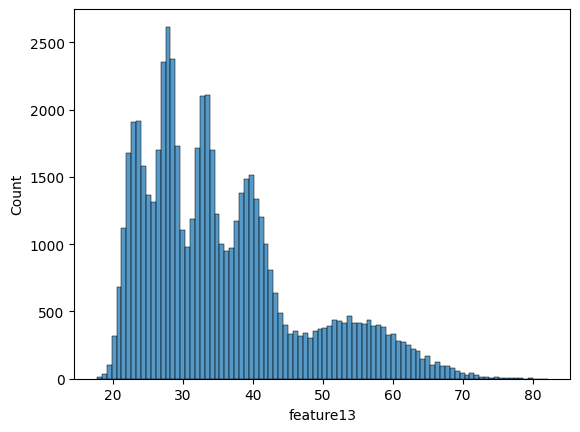

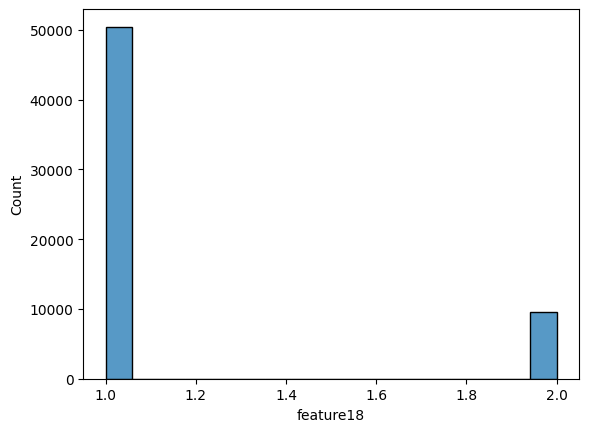

In [10]:
for col in df_numeric.columns:
    sns.histplot(df_numeric[col])
    plt.show()

In [11]:
for col in df_categorical.columns:
    display(df_categorical[col].value_counts())

feature1
V3    23659
V0    16355
V1    16130
V2     3856
Name: count, dtype: int64

feature3
V2    31782
V4    17474
V3     5317
V1     2936
V0     2491
Name: count, dtype: int64

feature4
V3     16634
V0     14005
V2     10761
V1      6183
V9      5822
V6      2962
V5      1450
V4       788
V10      765
V8       555
V7        75
Name: count, dtype: int64

feature6
V0    35846
V4    11013
V1     6231
V2     3872
V3     3038
Name: count, dtype: int64

feature7
V2    20178
V4    15405
V3    10360
V1    10319
V0     3738
Name: count, dtype: int64

feature8
4.0    27876
2.0    13694
3.0     9957
1.0     8473
Name: count, dtype: int64

feature9
V2    32919
V1    18545
V3     5502
V0     2972
V4       62
Name: count, dtype: int64

feature10
V0    54407
V2     3032
V1     2561
Name: count, dtype: int64

feature11
4.0    24614
2.0    18444
3.0     8981
1.0     7961
Name: count, dtype: int64

feature12
V2    19540
V0    17068
V1    14068
V3     9324
Name: count, dtype: int64

feature14
none      48517
bank       8435
stores     3048
Name: count, dtype: int64

feature15
V1    42275
V0    10995
V2     6730
Name: count, dtype: int64

feature16
1.0    37794
2.0    19681
3.0     1930
4.0      595
Name: count, dtype: int64

feature17
V2    37390
V1    12099
V3     8908
V0     1603
Name: count, dtype: int64

feature19
none    35672
yes     24328
Name: count, dtype: int64

feature20
yes    57645
no      2355
Name: count, dtype: int64

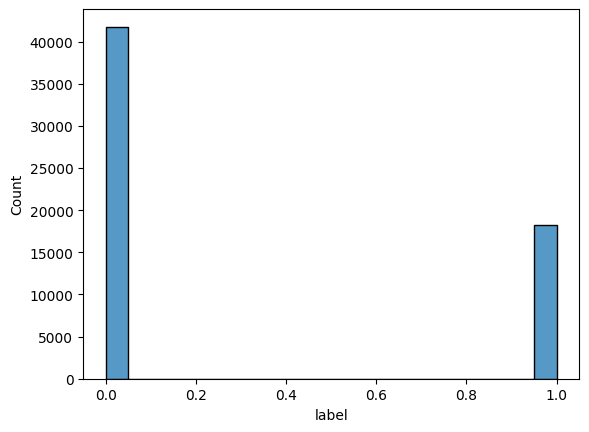

In [12]:
sns.histplot(series_label)
plt.show()

# Bi-variate

In [ ]:
for col in df_numeric.columns:
    data = [df_numeric[col][series_label==0], df_numeric[col][series_label==1]]
    plt.boxplot(data)
    plt.title(col)
    plt.show()